# Tutorial: Path Histogram

This gives a little overview of the option and behavior of the `PathHistogram` object. The `PathHistogram` is used for path density plots and free energy plots. It extends the basic `SparseHistogram` code by allowing for interpolation between bins, and by allowing one to normalize on a per-trajectory basis.

In [1]:
import openpathsampling as paths
from openpathsampling.analysis import PathHistogram
from openpathsampling.analysis import HistogramPlotter2D

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy
import pandas as pd

def dataframe_from_counter(counter, ndim):
    mtx = scipy.sparse.dok_matrix(ndim)
    for k in counter.keys():
        mtx[k[0],k[1]] = counter[k]
    df = pd.DataFrame(mtx.todense())
    return df

In [3]:
trajectory = [(0.1, 0.3), (2.1, 3.1), (1.7, 1.4), (1.6, 0.6), (0.1, 1.4), (2.2, 3.3)]
x, y = zip(*trajectory)

Here's our trajectory. The grid happens to correspond with the bins I'll use for the histograms.

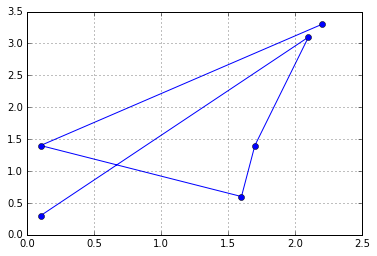

In [4]:
plt.grid(True)
plt.plot(x, y, 'o-')

The first type of histogram is what you'd get from just histogramming the frames.

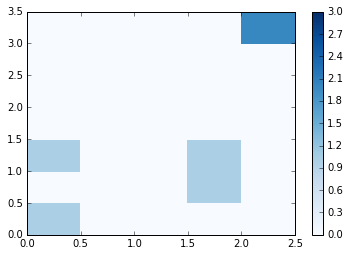

In [5]:
hist = PathHistogram(left_bin_edges=(0.0,0.0), bin_widths=(0.5,0.5), interpolate=False, per_traj=False)

hist.add_trajectory(trajectory)
HistogramPlotter2D(hist).plot(normed=False, xlim=(0,2.5), ylim=(0, 3.5), cmap="Blues", vmin=0, vmax=3)

In [6]:
hist._histogram

Counter({(0.0, 0.0): 1.0,
         (0.0, 2.0): 1.0,
         (3.0, 1.0): 1.0,
         (3.0, 2.0): 1.0,
         (4.0, 6.0): 2.0})

The next type of histogram uses that fact that we know this is a trajectory, so we do linear interpolation between the frames. This gives us a count of every time the trajectory enters a given bin. We can use this kind of histogram for free energy plots based on the reweighted path ensemble.

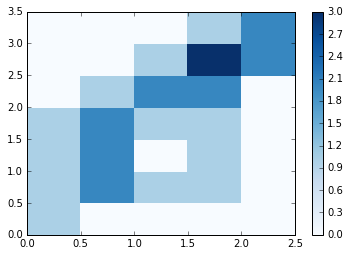

In [7]:
hist = PathHistogram(left_bin_edges=(0.0,0.0), bin_widths=(0.5,0.5), interpolate=True, per_traj=False)

hist.add_trajectory(trajectory)
HistogramPlotter2D(hist).plot(normed=False, xlim=(0,2.5), ylim=(0, 3.5), cmap="Blues", vmin=0, vmax=3)

The next type of histogram uses the interpolation, but also normalizes so that each trajectory only contributes once per bin. This is what we use for a path density plot.

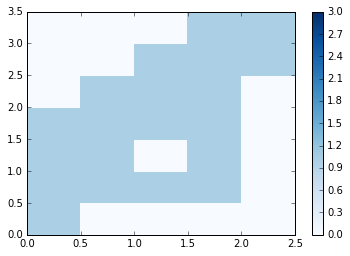

In [8]:
hist = PathHistogram(left_bin_edges=(0.0,0.0), bin_widths=(0.5,0.5), interpolate=True, per_traj=True)

hist.add_trajectory(trajectory)
HistogramPlotter2D(hist).plot(normed=False, xlim=(0,2.5), ylim=(0, 3.5), cmap="Blues", vmin=0, vmax=3)

Of course, we can normalize to one contribution per path while *not* interpolating. I don't think this is actually useful.

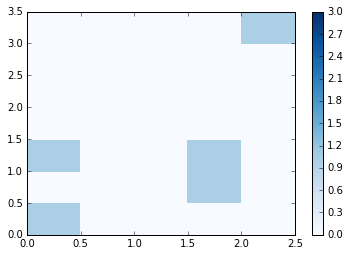

In [9]:
hist = PathHistogram(left_bin_edges=(0.0,0.0), bin_widths=(0.5,0.5), interpolate=False, per_traj=True)

hist.add_trajectory(trajectory)
HistogramPlotter2D(hist).plot(normed=False, xlim=(0,2.5), ylim=(0, 3.5), cmap="Blues", vmin=0, vmax=3)

Hypothetically, it is possible for a path to cut exactly through a corner. It won't happen in the real world, but we would like our interpolation algorithm to get even the unlikely cases right.

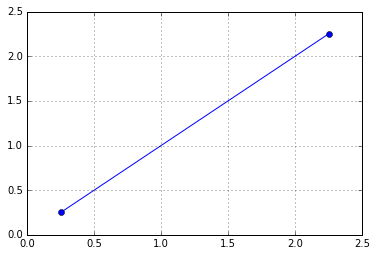

In [10]:
diag = [(0.25, 0.25), (2.25, 2.25)]
diag_x, diag_y = zip(*diag)
plt.grid(True)
plt.plot(diag_x, diag_y, 'o-')

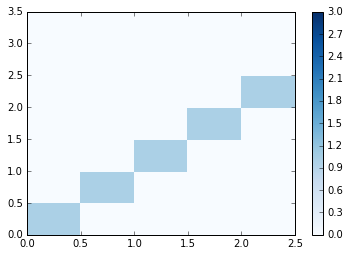

In [11]:
hist = PathHistogram(left_bin_edges=(0.0,0.0), bin_widths=(0.5,0.5), interpolate=True, per_traj=True)

hist.add_trajectory(diag)
HistogramPlotter2D(hist).plot(normed=False, xlim=(0,2.5), ylim=(0, 3.5), cmap="Blues", vmin=0, vmax=3)

How would we make this into an actual path density plot? Add the trajectories on top of each other.

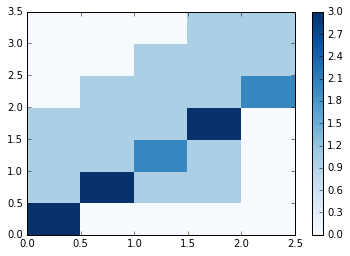

In [12]:
hist = PathHistogram(left_bin_edges=(0.0,0.0), bin_widths=(0.5,0.5), interpolate=True, per_traj=True)
hist.add_trajectory(diag, weight=2) # each trajectory can be assigned a weight (useful for RPE)
hist.add_trajectory(trajectory)
HistogramPlotter2D(hist).plot(normed=False, xlim=(0,2.5), ylim=(0, 3.5), cmap="Blues", vmin=0, vmax=3)

The actual `PathDensity` object also contains information about the collective variables we map this into, and has a convenience function to take a list of regular OPS trajectories and make the whole path histogram out of them.